In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import seaborn as sns


In [15]:

# Load dataset from URL
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
data = pd.read_csv(url)
data.head()



,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [3]:
# Convert date column to datetime
data['Date'] = pd.to_datetime(data['Date'])


In [4]:

# Set as index
data.set_index('Date', inplace=True)




In [5]:
# Keep only the numeric column you want to analyze
ts = data['Temp']



In [6]:
# ADF Test
result = adfuller(ts.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -4.4448049246117
p-value: 0.0002470826300360994
Critical Values: {'1%': np.float64(-3.4321532327220154), '5%': np.float64(-2.862336767636517), '10%': np.float64(-2.56719413172842)}


In [7]:

# Split into train/test
x = int(0.8 * len(data))
train_data = data.iloc[:x]
test_data = data.iloc[x:]




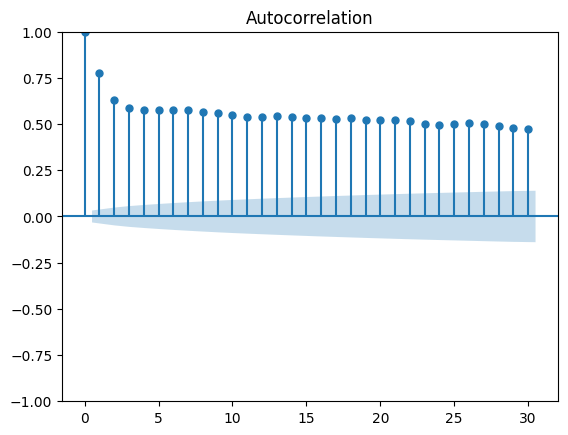

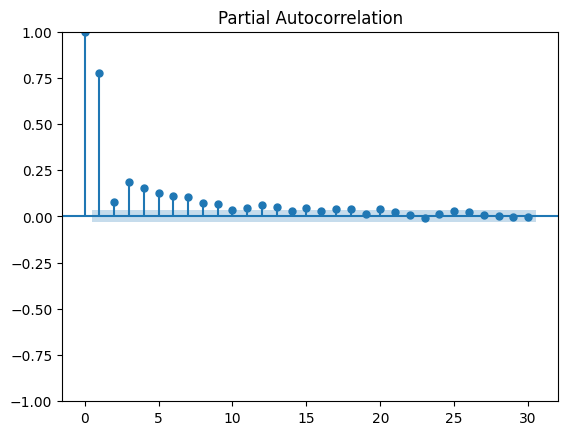

In [8]:
# Plot ACF and PACF
plot_acf(ts.dropna(), lags=30)
plot_pacf(ts.dropna(), lags=30)
plt.show()


In [9]:

# Split series into train and test
train_size = int(len(ts) * 0.8)
train, test = ts[0:train_size], ts[train_size:]



In [10]:
# Fit AR model (ensure lag < number of training points)
lags = min(5, len(train)-1)
model = AutoReg(train, lags=lags).fit()
print(model.summary())



                            AutoReg Model Results                             
Dep. Variable:                   Temp   No. Observations:                 2920
Model:                     AutoReg(5)   Log Likelihood               -6824.422
Method:               Conditional MLE   S.D. of innovations              2.515
Date:                Tue, 30 Sep 2025   AIC                          13662.844
Time:                        08:34:15   BIC                          13704.687
Sample:                             5   HQIC                         13677.917
                                 2920                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4622      0.157      9.309      0.000       1.154       1.770
Temp.L1        0.6432      0.018     35.031      0.000       0.607       0.679
Temp.L2       -0.0607      0.022     -2.778      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [12]:
# Forecast
preds = model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [13]:
# Calculate MSE
error = mean_squared_error(test, preds)
print("MSE:", error)



MSE: 16.699953385182454


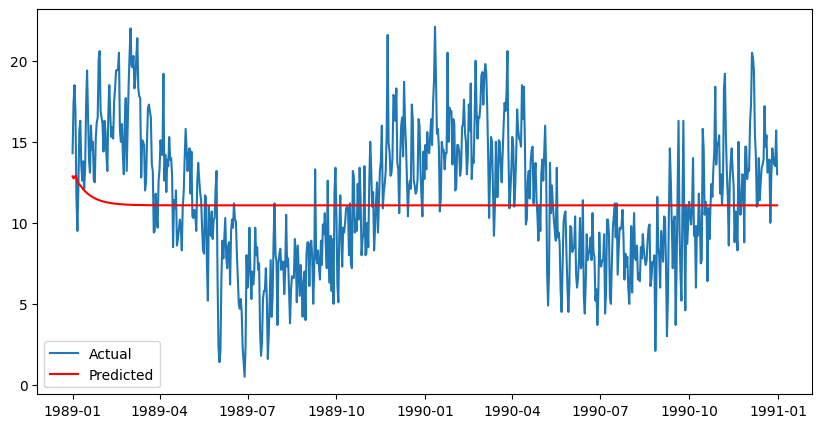

In [14]:
# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, preds, label='Predicted', color='red')
plt.legend()
plt.show()